Made by: **Abdulsamod Olaoye**

This notebook performs sentiment analysis on the Yoruba health dataset and provides an output of proper sentiment label of each row of data in the dataset.

In [2]:
import pandas as pd

# Load dataset
yoruba_df = pd.read_excel('/content/yoruba_health_cleaned.xlsx')

# Preview
yoruba_df.head(5)


,Yoruba Language,English Translation
0,igbesẹ yii waye lati jẹ kí abẹrẹ naa tete de s...,this step was taken to make the vaccine quickl...
1,"bavarian nordic a/s lo pelo abẹrẹ naa, ti ajọ ...","bavarian nordic a/s produced the vaccine, and ..."
2,"tẹlẹ, ko si abẹrẹ ajẹsara fun aarun mpox, eyi ...","previously, there was no vaccine for mpox, whi..."
3,"ọga agba fun who, dokita tedros adhanom ghebre...","who director-general, dr. tedros adhanom ghebr..."
4,dokita yukiko nakatani salaye pe bibuwọlu abẹr...,dr. yukiko nakatani explained that the approva...


In [8]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\\S+|www\\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z0-9\sáàèéíìóòúùọṣ]", "", text)  # keep Yoruba chars and spaces
    text = re.sub(r"\s+", " ", text).strip() # replace multiple spaces with single and strip
    return text

yoruba_df['clean_text'] = yoruba_df['Yoruba Language'].apply(clean_text)
yoruba_df.head()

,Yoruba Language,English Translation,clean_text,sentiment,text_length
0,igbesẹ yii waye lati jẹ kí abẹrẹ naa tete de s...,this step was taken to make the vaccine quickl...,igbes yii waye lati j kí abr naa tete de sibi ...,positive,1
1,"bavarian nordic a/s lo pelo abẹrẹ naa, ti ajọ ...","bavarian nordic a/s produced the vaccine, and ...",bavarian nordic as lo pelo abr naa ti ajọ euro...,neutral,1
2,"tẹlẹ, ko si abẹrẹ ajẹsara fun aarun mpox, eyi ...","previously, there was no vaccine for mpox, whi...",tl ko si abr ajsara fun aarun mpox eyi to fa t...,neutral,1
3,"ọga agba fun who, dokita tedros adhanom ghebre...","who director-general, dr. tedros adhanom ghebr...",ọga agba fun who dokita tedros adhanom ghebrey...,positive,1
4,dokita yukiko nakatani salaye pe bibuwọlu abẹr...,dr. yukiko nakatani explained that the approva...,dokita yukiko nakatani salaye pe bibuwọlu abr ...,neutral,1


In [5]:
# Adding sentiment labels to the data
# Needed for sentiment visualization

!pip install textblob
from textblob import TextBlob
import pandas as pd

def detect_sentiment(text):
    try:
        blob = TextBlob(str(text))
        polarity = blob.sentiment.polarity
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'
    except:
        return 'neutral'

# Apply to English Translation column
yoruba_df['sentiment'] = yoruba_df['English Translation'].apply(detect_sentiment)

# Check results
yoruba_df[['English Translation', 'sentiment']].head(10)

# Save to Excel
yoruba_df.to_excel('yoruba_health_labeled.xlsx', index=False)


**Exploratory Data Analysis**

This section analyses and visualizes the dataset, exploring things like text length, word frequency, and sentiment distribution.

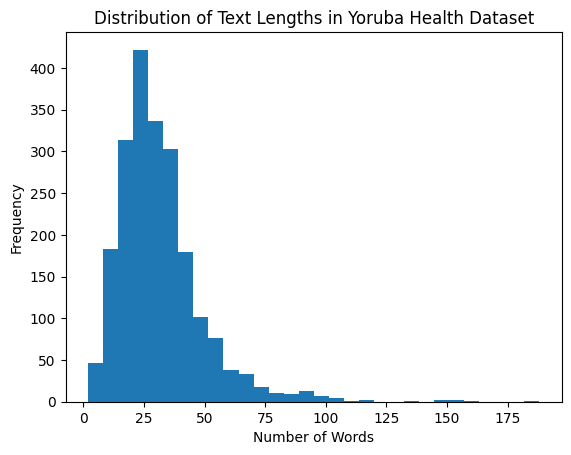

In [9]:
# Text Length Distribution - visualizing the length of sentences in the dataset and their frequencies

import matplotlib.pyplot as plt

# Create a column for text length
yoruba_df['text_length'] = yoruba_df['clean_text'].apply(lambda x: len(str(x).split()))

# Plot distribution
plt.hist(yoruba_df['text_length'], bins=30)
plt.title('Distribution of Text Lengths in Yoruba Health Dataset')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

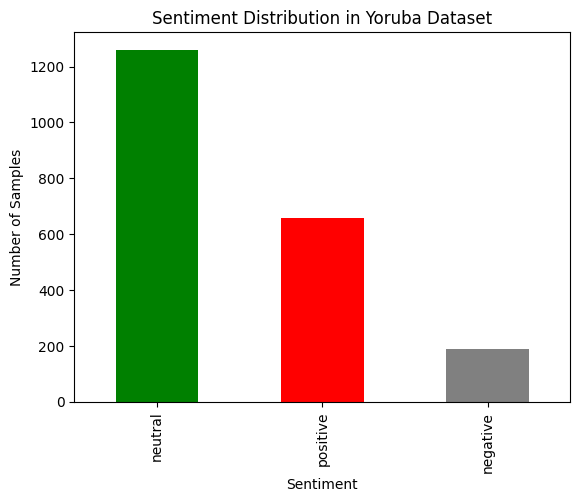

In [11]:
# Sentiment Distribution - visualizing the number of positive, negative or neutral sentences

yoruba_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Yoruba Health Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.show()

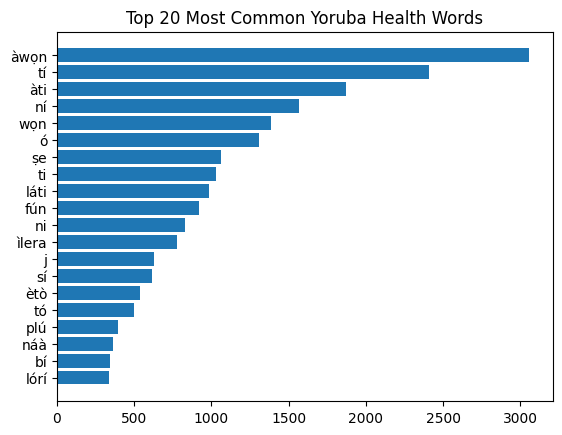

In [12]:
# Word Frequency Analysis - this checks for most frequent words in the dataset

from collections import Counter

# Combine all Yoruba text
all_words = ' '.join(yoruba_df['clean_text']).split()

# Count the most common words
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)

# Visualize
words, counts = zip(*most_common)
plt.barh(words, counts)
plt.title('Top 20 Most Common Yoruba Health Words')
plt.gca().invert_yaxis()
plt.show()

In [13]:
# Common words by sentiment - this identifies the most common positive and negative words

# Separate by sentiment
positive_text = ' '.join(yoruba_df[yoruba_df['sentiment'] == 'positive']['clean_text'])
negative_text = ' '.join(yoruba_df[yoruba_df['sentiment'] == 'negative']['clean_text'])

positive_words = Counter(positive_text.split()).most_common(10)
negative_words = Counter(negative_text.split()).most_common(10)

print("🔹 Top Positive Words:")
for w, c in positive_words:
    print(f"{w}: {c}")

print("\n🔸 Top Negative Words:")
for w, c in negative_words:
    print(f"{w}: {c}")


🔹 Top Positive Words:
àwọn: 1000
tí: 819
àti: 617
ní: 551
ó: 477
wọn: 473
ṣe: 356
ti: 344
fún: 329
láti: 314

🔸 Top Negative Words:
àwọn: 300
tí: 212
wọn: 159
àti: 148
ní: 139
ó: 111
ti: 96
ni: 96
ṣe: 82
láti: 74
